In [ ]:
import pandas as pd

# Load your data into a DataFrame
data = pd.read_csv('/content/normalized_data-1.csv', parse_dates=['Date'])

# Since your 'Valeur' column is used to differentiate assets, pivot the table so each unique 'Valeur' becomes a column
# Assume 'Adjusted_Close' is what we will use to calculate returns
pivoted_data = data.pivot_table(index='Date', columns='Valeur', values='Adjusted_Close')

# Display the pivoted data
print(pivoted_data.head())


Valeur      0.000000  0.052632  0.105263  0.157895  0.210526  0.263158  \
Date                                                                     
2020-02-14       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02-17       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02-18       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02-19       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02-20       NaN       NaN       NaN       NaN       NaN       NaN   

Valeur      0.315789  0.368421  0.421053  0.473684  0.526316  0.578947  \
Date                                                                     
2020-02-14       NaN       NaN       NaN  0.313644       NaN       NaN   
2020-02-17       NaN       NaN       NaN  0.321336       NaN       NaN   
2020-02-18       NaN       NaN       NaN  0.324034       NaN       NaN   
2020-02-19       NaN       NaN       NaN  0.326790       NaN       NaN   
2020-02-20       NaN       NaN       

In [ ]:
# Fill missing values with forward fill, then backward fill
pivot_changes_filled = pivoted_data.fillna(method='ffill').fillna(method='bfill')

print(pivot_changes_filled)

Valeur      0.000000  0.052632  0.105263  0.157895  0.210526  0.263158  \
Date                                                                     
2020-02-14  0.001837  0.055450  0.011997  0.006085  0.055163  0.033925   
2020-02-17  0.001837  0.055450  0.011997  0.006085  0.055163  0.033925   
2020-02-18  0.001837  0.055450  0.011997  0.006085  0.055163  0.033925   
2020-02-19  0.001837  0.055450  0.011997  0.006085  0.055163  0.033925   
2020-02-20  0.001837  0.055450  0.011997  0.006085  0.055163  0.033925   
...              ...       ...       ...       ...       ...       ...   
2024-01-15  0.000459  0.044257  0.016073  0.017852  0.041329  0.045520   
2024-01-16  0.000459  0.044257  0.016073  0.017852  0.041329  0.045520   
2024-01-17  0.000459  0.044257  0.016073  0.017852  0.041329  0.045520   
2024-01-18  0.000459  0.044257  0.016073  0.017852  0.041329  0.045520   
2024-01-19  0.000459  0.044257  0.016073  0.017852  0.041329  0.045520   

Valeur      0.315789  0.368421  0.421

In [ ]:
# Calculate daily returns for each asset
returns = pivot_changes_filled.pct_change().dropna()

# Print the returns to verify the calculations
print(returns.head())


Valeur      0.000000  0.052632  0.105263  0.157895  0.210526  0.263158  \
Date                                                                     
2020-02-17       0.0       0.0       0.0       0.0       0.0       0.0   
2020-02-18       0.0       0.0       0.0       0.0       0.0       0.0   
2020-02-19       0.0       0.0       0.0       0.0       0.0       0.0   
2020-02-20       0.0       0.0       0.0       0.0       0.0       0.0   
2020-02-21       0.0       0.0       0.0       0.0       0.0       0.0   

Valeur      0.315789  0.368421  0.421053  0.473684  0.526316  0.578947  \
Date                                                                     
2020-02-17       0.0       0.0       0.0  0.024524       0.0       0.0   
2020-02-18       0.0       0.0       0.0  0.008396       0.0       0.0   
2020-02-19       0.0       0.0       0.0  0.008503       0.0       0.0   
2020-02-20       0.0       0.0       0.0 -0.000176       0.0       0.0   
2020-02-21       0.0       0.0       

In [ ]:
# Remove the column '0.000000'
pivot_changes_filled.drop(columns=[0.000000], inplace=True)

# Verify the column is removed by displaying the first few rows of the updated DataFrame
print(pivot_changes_filled.head())




Valeur      0.052632  0.105263  0.157895  0.210526  0.263158  0.315789  \
Date                                                                     
2020-02-14   0.05545  0.011997  0.006085  0.055163  0.033925  0.023535   
2020-02-17   0.05545  0.011997  0.006085  0.055163  0.033925  0.023535   
2020-02-18   0.05545  0.011997  0.006085  0.055163  0.033925  0.023535   
2020-02-19   0.05545  0.011997  0.006085  0.055163  0.033925  0.023535   
2020-02-20   0.05545  0.011997  0.006085  0.055163  0.033925  0.023535   

Valeur      0.368421  0.421053  0.473684  0.526316  0.578947  0.631579  \
Date                                                                     
2020-02-14  0.047012  0.080707  0.313644  0.037082  0.034613  0.059468   
2020-02-17  0.047012  0.080707  0.321336  0.037082  0.034613  0.059468   
2020-02-18  0.047012  0.080707  0.324034  0.037082  0.034613  0.059468   
2020-02-19  0.047012  0.080707  0.326790  0.037082  0.034613  0.059468   
2020-02-20  0.047012  0.080707  0.326

In [ ]:
# Calculate daily returns for each asset
daily_returns = pivot_changes_filled.pct_change().dropna()

# Display the first few rows of the daily returns to verify
print(daily_returns.head())




Valeur      0.052632  0.105263  0.157895  0.210526  0.263158  0.315789  \
Date                                                                     
2020-02-17       0.0       0.0       0.0       0.0       0.0       0.0   
2020-02-18       0.0       0.0       0.0       0.0       0.0       0.0   
2020-02-19       0.0       0.0       0.0       0.0       0.0       0.0   
2020-02-20       0.0       0.0       0.0       0.0       0.0       0.0   
2020-02-21       0.0       0.0       0.0       0.0       0.0       0.0   

Valeur      0.368421  0.421053  0.473684  0.526316  0.578947  0.631579  \
Date                                                                     
2020-02-17       0.0       0.0  0.024524       0.0       0.0       0.0   
2020-02-18       0.0       0.0  0.008396       0.0       0.0       0.0   
2020-02-19       0.0       0.0  0.008503       0.0       0.0       0.0   
2020-02-20       0.0       0.0 -0.000176       0.0       0.0       0.0   
2020-02-21       0.0       0.0 -0.007

Mean Returns:
 Valeur
0.052632   -0.000130
0.105263    0.000414
0.157895    0.001402
0.210526   -0.000188
0.263158    0.000352
0.315789   -0.000013
0.368421   -0.000340
0.421053   -0.000080
0.473684    0.000584
0.526316    0.000703
0.578947   -0.000068
0.631579    0.000422
0.684211    0.000079
0.736842   -0.000072
0.789474    0.000013
0.842105    0.000511
0.894737    0.000705
0.947368    0.000438
1.000000   -0.000689
dtype: float64
Covariance Matrix:
 Valeur    0.052632      0.105263      0.157895      0.210526      0.263158  \
Valeur                                                                       
0.052632  0.000200  3.266194e-06  9.908583e-06  4.351378e-05  4.116850e-06   
0.105263  0.000003  2.365411e-04  1.965941e-06  4.977916e-06 -2.985850e-06   
0.157895  0.000010  1.965941e-06  6.248068e-04  1.492291e-05 -2.308936e-07   
0.210526  0.000044  4.977916e-06  1.492291e-05  2.104952e-04 -6.221203e-07   
0.263158  0.000004 -2.985850e-06 -2.308936e-07 -6.221203e-07  1.056394e-04  

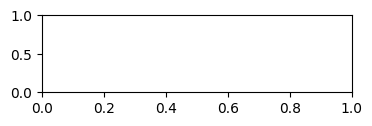

In [ ]:
# Calculate mean returns and covariance matrix for each asset
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Display the calculated mean returns and covariance matrix
print("Mean Returns:\n", mean_returns)
print("Covariance Matrix:\n", cov_matrix)

In [ ]:
print("Shape of mean_returns:", mean_returns.shape)
print("Shape of weights:", weights.shape)


Shape of mean_returns: (19,)
Shape of weights: (19,)


In [ ]:
import cvxpy as cp
import numpy as np

# Convert mean_returns to a numpy array explicitly if it's a pandas Series
mean_returns_array = mean_returns.values if isinstance(mean_returns, pd.Series) else mean_returns

# Ensure the numpy array is handled as a row vector for the dot product with the column vector 'weights'
portfolio_return = mean_returns_array @ weights

# Redefine the problem with the corrected calculation
portfolio_risk = cp.quad_form(weights, cov_matrix)
objective = cp.Maximize((portfolio_return - risk_free_rate) / cp.sqrt(portfolio_risk))
constraints = [cp.sum(weights) == 1, weights >= 0]






In [ ]:
# Explicitly reshape mean_returns_array to be a row vector if necessary
mean_returns_array = mean_returns_array.reshape(1, -1) if mean_returns_array.ndim == 1 else mean_returns_array

# Recalculate the portfolio return
portfolio_return = cp.matmul(mean_returns_array, weights)


In [ ]:
import cvxpy as cp

# Define the risk-free rate
risk_free_rate = 0.01

# Define the weights as a cvxpy variable
weights = cp.Variable(n_assets)

# Calculate the portfolio's expected return
portfolio_return = mean_returns.T @ weights

# Define the portfolio's risk (variance)
portfolio_risk = cp.quad_form(weights, cov_matrix)

# Define maximum acceptable variance (set based on your risk tolerance)
max_risk = 0.05

# Objective: Maximize expected return minus a risk free rate
objective = cp.Maximize(portfolio_return - risk_free_rate)

# Constraints: sum of weights is 1, all weights are non-negative, and risk does not exceed max risk
constraints = [cp.sum(weights) == 1, weights >= 0, portfolio_risk <= max_risk]

# Setup and solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Check if the problem was solved successfully
if problem.status in [cp.OPTIMAL, cp.OPTIMAL_INACCURATE]:
    optimal_weights = weights.value
    print("Optimal Portfolio Weights:\n", optimal_weights)
    print("Expected Portfolio Return:", portfolio_return.value)
    print("Portfolio Risk (Variance):", portfolio_risk.value)
else:
    print("Problem Status:", problem.status)


IndexError: tuple index out of range

In [ ]:
import numpy as np
import cvxpy as cp

# Ensure mean_returns is a numpy array and correctly shaped
mean_returns_array = np.array(mean_returns.values).flatten()  # Use flatten to ensure it is a proper 1D array

# Define the number of assets based on the length of mean_returns
n_assets = len(mean_returns_array)

# Define weights as a CVXPY variable
weights = cp.Variable(n_assets)

# Calculate the portfolio's expected return
portfolio_return = mean_returns_array @ weights  # Dot product between a 1D numpy array and CVXPY variable



In [ ]:
print("mean_returns_array shape:", mean_returns_array.shape)
print(portfolio_return)


mean_returns_array shape: (19,)
[-1.30320045e-04  4.13606954e-04  1.40245096e-03 -1.88067560e-04
  3.51640188e-04 -1.28674868e-05 -3.40319492e-04 -8.02774752e-05
  5.84196533e-04  7.02960809e-04 -6.79032163e-05  4.22165578e-04
  7.92113155e-05 -7.15627597e-05  1.30284996e-05  5.11028533e-04
  7.04669201e-04  4.38304581e-04 -6.89295628e-04] @ var125


In [ ]:
# Define the portfolio's risk (variance)
portfolio_risk = cp.quad_form(weights, cov_matrix)

# Set a risk-free rate and a maximum risk threshold
risk_free_rate = 0.08
max_risk = 1

# Objective: Maximize the expected return (adjusted for risk-free rate)
objective = cp.Maximize(portfolio_return - risk_free_rate)

# Constraints include: weights sum to 1, non-negative weights, and a cap on variance
constraints = [cp.sum(weights) == 1, weights >= 0, portfolio_risk <= max_risk]

# Setup and solve the optimization problem using CVXPY
problem = cp.Problem(objective, constraints)
problem.solve()

# Output the results
if problem.status in [cp.OPTIMAL, cp.OPTIMAL_INACCURATE]:
    optimal_weights = weights.value
    print("Optimal Portfolio Weights:\n", optimal_weights)
    print("Expected Portfolio Return:", portfolio_return.value)
    print("Portfolio Risk (Variance):", portfolio_risk.value)
else:
    print("Problem Status:", problem.status)


Optimal Portfolio Weights:
 [7.39686077e-08 9.99364049e-08 9.99998332e-01 7.24095259e-08
 9.64064331e-08 8.98566545e-08 6.75986687e-08 7.50803934e-08
 1.16577082e-07 1.36985133e-07 7.61586572e-08 1.01039735e-07
 8.14017629e-08 7.50862223e-08 7.86204710e-08 1.08288997e-07
 1.37025242e-07 1.02321744e-07 7.96024450e-08]
Expected Portfolio Return: 0.0014024489863722588
Portfolio Risk (Variance): 0.0006248047233768029


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asset names (assuming you have 19 assets)
assets = ['Asset{}'.format(i+1) for i in range(n_assets)]

# Create a DataFrame for the visualization
portfolio_df = pd.DataFrame({
    'Assets': assets,
    'Weights': optimal_weights,
    'Return Contribution': optimal_weights * mean_returns_array,
    'Risk Contribution': optimal_weights * np.diag(cov_matrix)  # This approximates individual risk contributions
})

# Display the DataFrame
print(portfolio_df)


     Assets       Weights  Return Contribution  Risk Contribution
0    Asset1  7.396861e-08        -9.639592e-12       1.477608e-11
1    Asset2  9.993640e-08         4.133439e-11       2.363907e-11
2    Asset3  9.999983e-01         1.402449e-03       6.248057e-04
3    Asset4  7.240953e-08        -1.361788e-11       1.524186e-11
4    Asset5  9.640643e-08         3.390038e-11       1.018432e-11
5    Asset6  8.985665e-08        -1.156229e-12       3.876646e-11
6    Asset7  6.759867e-08        -2.300514e-11       8.871857e-12
7    Asset8  7.508039e-08        -6.027264e-12       6.982684e-12
8    Asset9  1.165771e-07         6.810393e-11       2.008176e-11
9   Asset10  1.369851e-07         9.629518e-11       2.586024e-11
10  Asset11  7.615866e-08        -5.171418e-12       1.996979e-11
11  Asset12  1.010397e-07         4.265550e-11       1.539792e-11
12  Asset13  8.140176e-08         6.447941e-12       1.371903e-11
13  Asset14  7.508622e-08        -5.373377e-12       2.075086e-12
14  Asset1

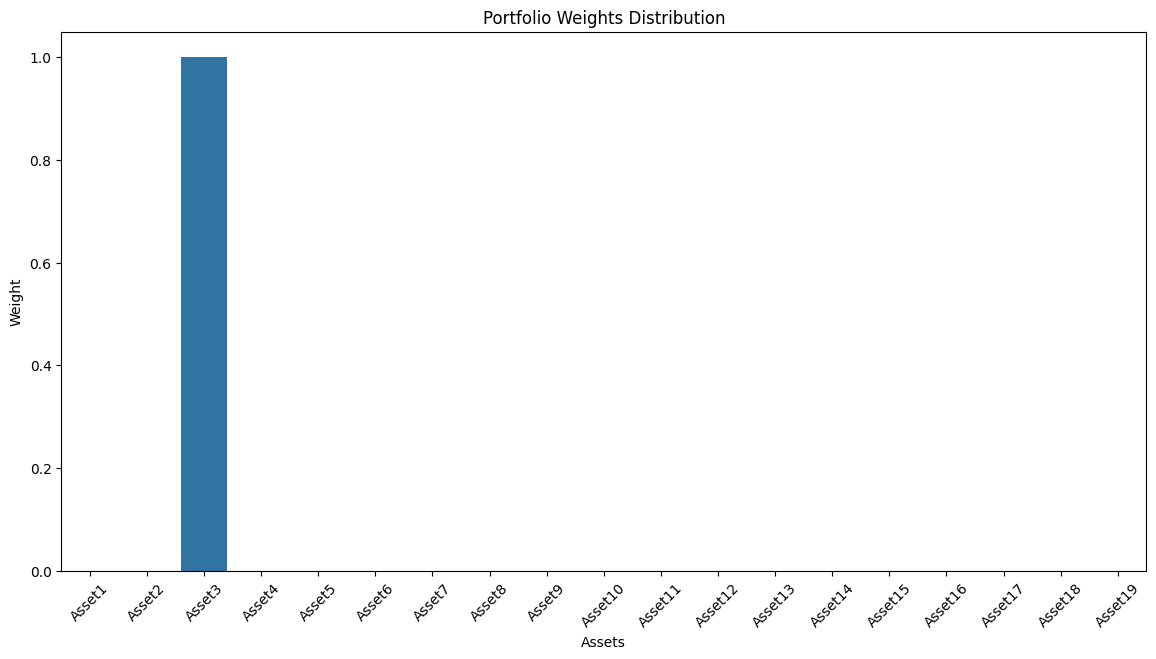

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Assets', y='Weights', data=portfolio_df)
plt.title('Portfolio Weights Distribution')
plt.ylabel('Weight')
plt.xlabel('Assets')
plt.xticks(rotation=45)
plt.show()


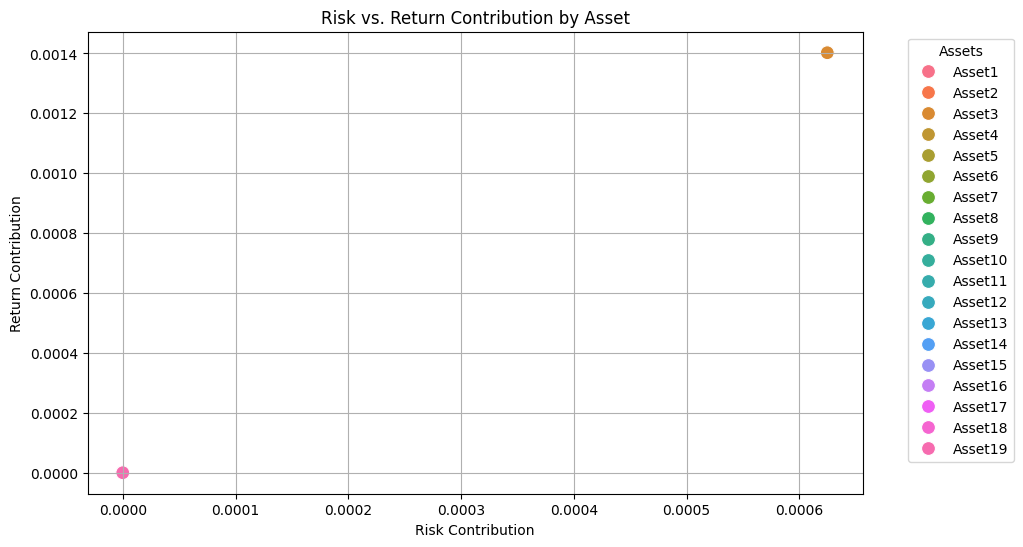

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Risk Contribution', y='Return Contribution', hue='Assets', data=portfolio_df, s=100)
plt.title('Risk vs. Return Contribution by Asset')
plt.xlabel('Risk Contribution')
plt.ylabel('Return Contribution')
plt.grid(True)
plt.legend(title='Assets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import cvxpy as cp
import numpy as np

# Number of assets
n_assets = len(mean_returns)

# Optimization variables (portfolio weights)
weights = cp.Variable(n_assets)

# Objective: Maximize the portfolio's expected return for a given level of risk
# Here, we'll minimize the portfolio variance
risk_free_rate = 0.01  # assuming a risk-free rate
portfolio_return = mean_returns.T @ weights
portfolio_risk = cp.quad_form(weights, cov_matrix)

# We'll use the Sharpe ratio as our objective
sharpe_ratio = (portfolio_return - risk_free_rate) / cp.sqrt(portfolio_risk)
objective = cp.Maximize(sharpe_ratio)

# Constraints: weights sum to 1 and no short selling
constraints = [cp.sum(weights) == 1, weights >= 0]

# Solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Get the optimal weights
optimal_weights = weights.value

# Display the optimal portfolio weights
print("Optimal Portfolio Weights:\n", optimal_weights)


IndexError: tuple index out of range